In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

from sklearn.linear_model import LogisticRegression # Import LogReg Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Examining Data

Our dataset included columns for ID and Diagnosis: M(for malignant) or B(for benign), with Diagnosis as the target variable. The remaining columns represented features, each with three different measurements. After examining the dataset, we identified the purpose of each measurement and renamed them accordingly. For example, texture 1 represents the mean of the radius and texture measurements, texture 2 represents the standard error of the mean for distances from the center to points on the perimeter, and texture 3 represents the "worst" or largest mean values for these distances, calculated as the mean of the three largest values. This approach was applied consistently across all features.

supporting url: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [25]:
# fetch dataset 
#congressional_voting_records = fetch_ucirepo(id=105) 

df = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
df.head(20)

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,M
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,M
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,M
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,M
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,M
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,M


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [28]:
df['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [29]:
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

# Preprocessing 

For preprocessing, we renamed our features to better reflect what the data represents. For example, texture 1 was renamed to "texture_mean," texture 2 to "texture_SE," and texture 3 to "texture_largest."

We also updated the diagnosis labels, with 0 representing a benign tumor and 1 representing a malignant tumor.

Our dataset did not contain any missing values, so no handling for missing data was required.



In [51]:
missing_values = df.isnull().sum()
missing_values

ID                    0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

no missing values

In [30]:
df_modified = df.copy()

In [31]:
df_modified.rename(columns={'radius1': 'radius_mean', 'radius2': 'radius_SE', 'radius3': 'radius_largest', 'smoothness1': 'smoothness_mean', 'smoothness2': 'smoothness_SE', 'smoothness3': 'smoothness_largest', 'texture1': 'texture_mean', 'texture2': 'texture_SE', 'texture3': 'texture_largest', 'perimeter1': 'perimeter_mean', 'perimeter2': 'perimeter_SE', 'perimeter3': 'perimeter_largest', 'area1': 'area_mean', 'area2': 'area_SE', 'area3': 'area_largest', 'compactness1': 'compactness_mean', 'compactness2': 'compactness_SE', 'compactness3': 'compactness_largest', 'concavity1': 'concavity_mean', 'concavity2': 'concavity_SE', 'concavity3': 'concavity_largest', 'concave_points1': 'concave_points_mean', 'concave_points2': 'concave_points_SE', 'concave_points3': 'concave_points_largest', 'symmetry1': 'symmetry_mean', 'symmetry2': 'symmetry_SE', 'symmetry3': 'symmetry_largest', 'fractal_dimension1': 'fractal_dimension_mean', 'fractal_dimension2': 'fractal_dimension_SE', 'fractal_dimension3': 'fractal_dimension_largest'}, inplace=True)

In [32]:

df_modified['Diagnosis']= df_modified['Diagnosis'].replace({'M':1, 'B':0})


/tmp/ipykernel_1125580/2014846951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modified['Diagnosis']= df_modified['Diagnosis'].replace({'M':1, 'B':0})


# Descriptive Tables

Original dataset:

In [33]:
df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


Modified Dataset:

In [34]:
df_modified

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_points_largest,symmetry_largest,fractal_dimension_largest,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# Experiment 1

Are radius and texture  good indicators of what the diagnosis might be?

In [35]:
experiment1 = df_modified[['radius_mean', 'texture_mean','Diagnosis']]
experiment1

,radius_mean,texture_mean,Diagnosis
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1
...,...,...,...
564,21.56,22.39,1
565,20.13,28.25,1
566,16.60,28.08,1
567,20.60,29.33,1


In [36]:
X = experiment1[['radius_mean', 'texture_mean']] # Features
y = experiment1['Diagnosis']

We split the dataset so 80% of it was used for training the model and 20% for testing.

In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1) 

In [38]:
clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train1,y_train1)
y_pred = clf.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))

Accuracy: 0.8596491228070176


/tmp/ipykernel_1125580/2195015707.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([benign['radius_mean'], malignant['radius_mean']], labels=['Benign', 'Malignant'])


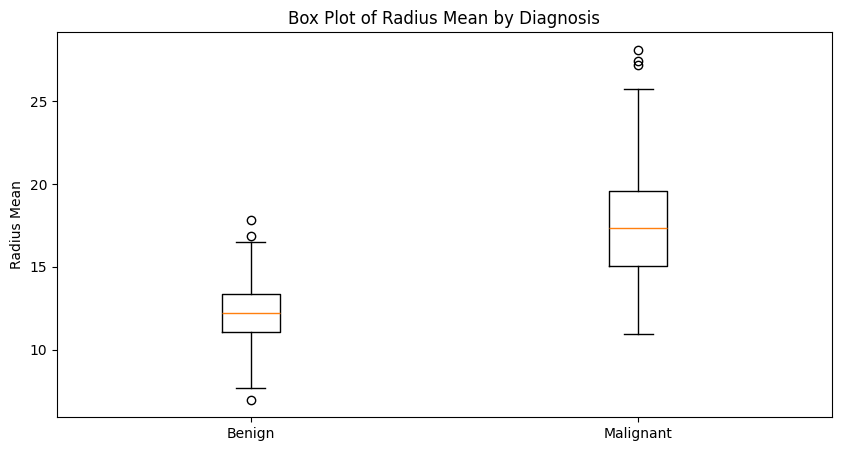

/tmp/ipykernel_1125580/2195015707.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([benign['texture_mean'], malignant['texture_mean']], labels=['Benign', 'Malignant'])


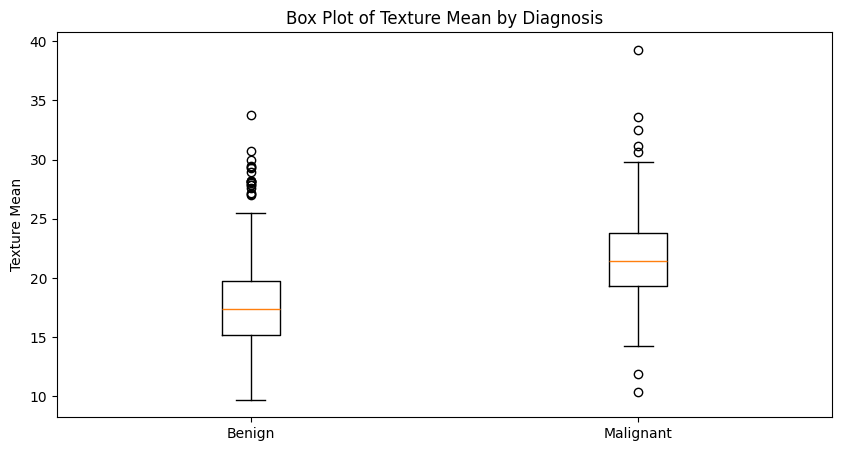

In [39]:
import matplotlib.pyplot as plt

# Separate data by diagnosis
benign = experiment1[experiment1['Diagnosis'] == 0]
malignant = experiment1[experiment1['Diagnosis'] == 1]

# Box plot for Radius Mean
plt.figure(figsize=(10, 5))
plt.boxplot([benign['radius_mean'], malignant['radius_mean']], labels=['Benign', 'Malignant'])
plt.title('Box Plot of Radius Mean by Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

# Box plot for Texture Mean
plt.figure(figsize=(10, 5))
plt.boxplot([benign['texture_mean'], malignant['texture_mean']], labels=['Benign', 'Malignant'])
plt.title('Box Plot of Texture Mean by Diagnosis')
plt.ylabel('Texture Mean')
plt.show()


The logistic regression model achieved about 86% accuracy, which is better than the 80% target we set as a baseline. This high accuracy suggests that just using radius and texture is quite effective for predicting whether a tumor is benign or malignant. The box plots for radius and texture also show clear differences between benign and malignant cases, supporting that these features help distinguish between the two.

In short, the results show that radius and texture are useful for identifying tumor type, although other factors might also improve predictions.

# Experiment 2

We want to determine whether adding more features will increase or decrease diagnostic accuracy.

In [40]:
experiment2 = df_modified[['radius_mean', 'texture_mean','perimeter_mean','area_mean','concavity_mean', 'Diagnosis']]
experiment2 

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,Diagnosis
0,17.99,10.38,122.80,1001.0,0.30010,1
1,20.57,17.77,132.90,1326.0,0.08690,1
2,19.69,21.25,130.00,1203.0,0.19740,1
3,11.42,20.38,77.58,386.1,0.24140,1
4,20.29,14.34,135.10,1297.0,0.19800,1
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.24390,1
565,20.13,28.25,131.20,1261.0,0.14400,1
566,16.60,28.08,108.30,858.1,0.09251,1
567,20.60,29.33,140.10,1265.0,0.35140,1


In [41]:
X = experiment2[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','concavity_mean']] # Features
y = experiment2['Diagnosis'] # Target variable

We split the dataset so 80% of it was used for training the model and 20% for testing.

In [42]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1) 

In [49]:
clf = LogisticRegression(random_state=0, max_iter=200) 
clf = clf.fit(X_train2,y_train2)
y_pred = clf.predict(X_test2)

print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.8771929824561403


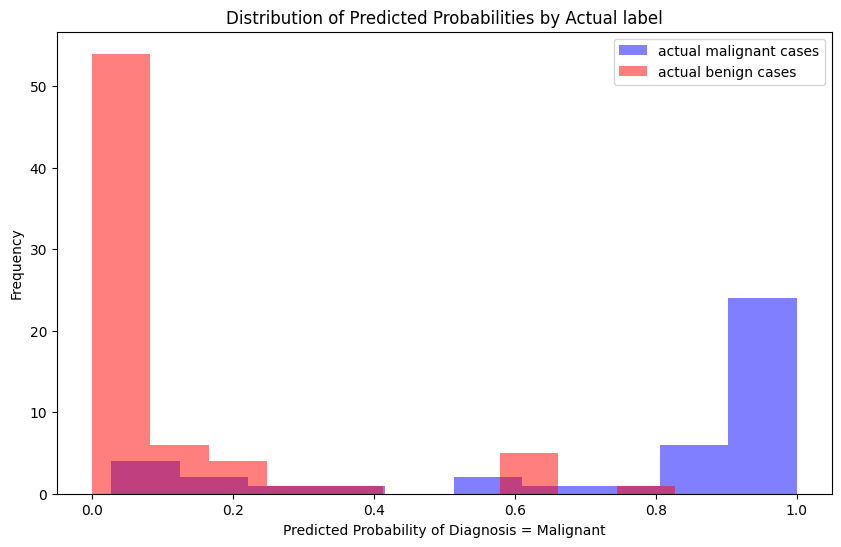

In [48]:
# Get prediction probabilities
y_pred_proba = clf.predict_proba(X_test2)[:, 1]  # Probability for malignant class based on our model
# Split probabilities based on the actual labels in y_test2
y_pred_proba_pos = y_pred_proba[y_test2 == 1]  # Probabilities for malignant cases
y_pred_proba_neg = y_pred_proba[y_test2 == 0]  # Probabilities for benign cases

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_pos, bins=10, alpha=0.5, label='actual malignant cases', color='blue')
plt.hist(y_pred_proba_neg, bins=10, alpha=0.5, label='actual benign cases', color='red')
plt.xlabel('Predicted Probability of Diagnosis = Malignant')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities by Actual label')
plt.legend()
plt.show()

Our logistic regression model achieved an accuracy of 87.72% on the test set which shows that the selected features (radius_mean, texture_mean, perimeter_mean, area_mean, and concavity_mean) are effective in distinguishing between malignant and benign cases. This means that the particular features we chose to add along iwth texture_mean and radius_mean have an impact on cancer being benign or malignant. The histograms showing the distribution of predicted probabilities for actual malignant and benign cases provide insight into how well the model separates the two classes. If there is a clear distinction between the two distributions(which there is), it indicates that the model is performing well in predicting the probabilities associated with each diagnosis, further showing that the idea of adding more features can enhance the model's accuracy.


# Conclusion

From the experiments we ran, we learned that some features, like "radius" and "texture," are useful for predicting if a tumor is malignant or benign. With just these two features, our model was able to correctly classify cases over 86% of the time, which is a good result and even better than our goal of 80%. This means we don’t need to use all the features to get helpful results. The dataset is strong because it has detailed measurements of each tumor, giving us a lot of information. Additionally, because there was no missing data, we didn’t need to spend time on filling in or adjusting data, which simplified the preprocessing step and kept the data more reliable. One downside of this dataset is that we didn’t have access to images of the tumors, as those files were broken or unavailable. Images would have helped us see details like tumor shape and texture patterns. Without these images, we could only use numbers in the data, which limited the model to specific measurements instead of giving us a full picture of each tumor's appearance.


We used a subset of the available features, choosing them based on the distribution patterns observed. Most mean features followed a normal distribution, whereas the standard error and worst features were mostly right-skewed. In the first experiment, we selected “radius” and “texture” specifically to examine how these two features related to diagnosis. In the second experiment, we added more features to check if this would make the model more accurate at diagnosing. By including features like "perimeter_mean","area_mean" and'concavity_mean' we wanted to see if these extra details would help the model find more patterns. In our case, it did help to add these extra features as it improved our accuracy by 2 percent which is significant considering the size of our dataset.

Since we had no missing data, we didn’t need to fill in any gaps, which kept the data preparation simple. 

Different researchers might select other features from the dataset or engineer new features (like combinations or transformations of the existing ones). These alternative feature selections could lead to varying degrees of model accuracy or insights. For example, features such as "concavity" or "smoothness" might reveal additional patterns that “radius” and “texture” don’t fully capture. 

This dataset can help create better tools to detect cancer early, which is crucial for effective treatment and can improve survival rates. If a simple model using just a few features works well, it could make diagnostic tools cheaper and easier to use, especially in places with limited healthcare resources. Over time, such a tool could even become more reliable than traditional methods, assisting doctors in making quicker and more accurate diagnoses, ultimately enhancing patients' quality of life."

